In [1]:
!pip install opendatasets


import opendatasets as od
# import pandas as pd

#od.download(r'https://www.kaggle.com/datasets/abhinav89/telecom-customer')


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from joblib import dump, load
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

ModuleNotFoundError: No module named 'imblearn'

In [4]:
#data = pd.read_csv(r"/content/telecom-customer/Telecom_customer churn.csv")
data = pd.read_csv("Telecom_customer churn.csv")

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
data.set_index(keys = 'Customer_ID', inplace = True)
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0
1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0
1000005,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y

In [7]:
# Percentage of Missing Data
missingPercnt = data.isnull().mean().round(4)*100
missingPercnt

rev_Mean             0.36
mou_Mean             0.36
totmrc_Mean          0.36
da_Mean              0.36
ovrmou_Mean          0.36
ovrrev_Mean          0.36
vceovr_Mean          0.36
datovr_Mean          0.36
roam_Mean            0.36
change_mou           0.89
change_rev           0.89
drop_vce_Mean        0.00
drop_dat_Mean        0.00
blck_vce_Mean        0.00
blck_dat_Mean        0.00
unan_vce_Mean        0.00
unan_dat_Mean        0.00
plcd_vce_Mean        0.00
plcd_dat_Mean        0.00
recv_vce_Mean        0.00
recv_sms_Mean        0.00
comp_vce_Mean        0.00
comp_dat_Mean        0.00
custcare_Mean        0.00
ccrndmou_Mean        0.00
cc_mou_Mean          0.00
inonemin_Mean        0.00
threeway_Mean        0.00
mou_cvce_Mean        0.00
mou_cdat_Mean        0.00
mou_rvce_Mean        0.00
owylis_vce_Mean      0.00
mouowylisv_Mean      0.00
iwylis_vce_Mean      0.00
mouiwylisv_Mean      0.00
peak_vce_Mean        0.00
peak_dat_Mean        0.00
mou_peav_Mean        0.00
mou_pead_Mea

In [8]:
# Delete the Columns having missing value greater than 15%
# data_c = data.copy()
deleted_cols = []
for cols, percnt in enumerate(missingPercnt):
  if percnt > 15:
    deleted_cols.append(data.columns[cols])

data.drop(deleted_cols, axis=1, inplace = True)

deleted_cols

['ownrent',
 'lor',
 'dwlltype',
 'adults',
 'infobase',
 'income',
 'numbcars',
 'HHstatin',
 'dwllsize']

**Cleaning Numerical Data**

In [9]:
# Numeric Data
data.select_dtypes(np.number).info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1000001 to 1100000
Data columns (total 74 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rev_Mean         99643 non-null   float64
 1   mou_Mean         99643 non-null   float64
 2   totmrc_Mean      99643 non-null   float64
 3   da_Mean          99643 non-null   float64
 4   ovrmou_Mean      99643 non-null   float64
 5   ovrrev_Mean      99643 non-null   float64
 6   vceovr_Mean      99643 non-null   float64
 7   datovr_Mean      99643 non-null   float64
 8   roam_Mean        99643 non-null   float64
 9   change_mou       99109 non-null   float64
 10  change_rev       99109 non-null   float64
 11  drop_vce_Mean    100000 non-null  float64
 12  drop_dat_Mean    100000 non-null  float64
 13  blck_vce_Mean    100000 non-null  float64
 14  blck_dat_Mean    100000 non-null  float64
 15  unan_vce_Mean    100000 non-null  float64
 16  unan_dat_Mean    100000 non-null  fl

In [10]:
Numerical_data = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean',
                  'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean',
                  'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
                  'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean',
                  'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean',
                  'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean',
                  'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou',
                  'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty',
                  'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'lor', 'income', 'forgntvl', 'eqpdays']

In [11]:
numeric_cols_to_fill = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean',
                        'change_mou', 'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'forgntvl', 'eqpdays']

clean_data = data.copy()


# group = clean_data.groupby("new_cell")

# def fill_with_mean_val(group):
#     return group[numeric_cols_to_fill].fillna(group[numeric_cols_to_fill].mean())

# clean_data[numeric_cols_to_fill] = group.apply(fill_with_mean_val).reset_index(drop=True)[numeric_cols_to_fill]


for column in numeric_cols_to_fill:
  clean_data[column].fillna(clean_data[column].mean(), inplace = True)

**Cleaning Catagorical Data**

In [12]:
# Catagorical Data
data.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1000001 to 1100000
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   new_cell          100000 non-null  object
 1   crclscod          100000 non-null  object
 2   asl_flag          100000 non-null  object
 3   prizm_social_one  92612 non-null   object
 4   area              99960 non-null   object
 5   dualband          99999 non-null   object
 6   refurb_new        99999 non-null   object
 7   hnd_webcap        89811 non-null   object
 8   marital           98268 non-null   object
 9   ethnic            98268 non-null   object
 10  kid0_2            98268 non-null   object
 11  kid3_5            98268 non-null   object
 12  kid6_10           98268 non-null   object
 13  kid11_15          98268 non-null   object
 14  kid16_17          98268 non-null   object
 15  creditcd          98268 non-null   object
dtypes: object(16)
memory usage: 13.0+ MB

In [13]:
categorical_data = ['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap',
                    'marital', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']

In [14]:
columns_to_fill = ['prizm_social_one', 'area', 'dualband', 'refurb_new', 'marital', 'ethnic', 'hnd_webcap',
                   'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']

for column in columns_to_fill:
  clean_data[column].fillna(clean_data[column].mode().iloc[0], inplace = True)

In [15]:
#Filling missing Data of hnd_webcap using Numeric Data

# categorical_data_to_remove = ['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new',
#                     'marital', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']

# sample_df = clean_data.drop(categorical_data_to_remove, axis = 1)

# test = sample_df[sample_df['hnd_webcap'].isnull()]
# x_test = sample_df.drop(['hnd_webcap'], axis=1)


# train = sample_df[sample_df['hnd_webcap'].notnull()]
# x_train = train.drop(['hnd_webcap'], axis=1)
# y_train = train['hnd_webcap']
# x_train.shape, y_train.shape

In [16]:
clean_data.select_dtypes(np.number).info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1000001 to 1100000
Data columns (total 74 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rev_Mean         100000 non-null  float64
 1   mou_Mean         100000 non-null  float64
 2   totmrc_Mean      100000 non-null  float64
 3   da_Mean          100000 non-null  float64
 4   ovrmou_Mean      100000 non-null  float64
 5   ovrrev_Mean      100000 non-null  float64
 6   vceovr_Mean      100000 non-null  float64
 7   datovr_Mean      100000 non-null  float64
 8   roam_Mean        100000 non-null  float64
 9   change_mou       100000 non-null  float64
 10  change_rev       100000 non-null  float64
 11  drop_vce_Mean    100000 non-null  float64
 12  drop_dat_Mean    100000 non-null  float64
 13  blck_vce_Mean    100000 non-null  float64
 14  blck_dat_Mean    100000 non-null  float64
 15  unan_vce_Mean    100000 non-null  float64
 16  unan_dat_Mean    100000 non-null  fl

In [17]:
for column in categorical_data:
  unique_vals = clean_data[column].unique()
  print(f'Column: {column}')
  print(unique_vals)
  print(len(unique_vals))
  print('----------------------')

Column: new_cell
['U' 'N' 'Y']
3
----------------------
Column: crclscod
['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'I' 'AA' 'J' 'U' 'Z' 'K' 'E' 'E4' 'W'
 'DA' 'Y' 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'IF' 'Z1' 'O' 'M' 'L'
 'U1' 'Z4' 'A2' 'V' 'TP' 'EM' 'C2' 'C5' 'S' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2'
 'A3' 'V1' 'EF' 'Z2' 'CY' 'P1' 'ZF']
54
----------------------
Column: asl_flag
['N' 'Y']
2
----------------------
Column: prizm_social_one
['S' 'U' 'T' 'C' 'R']
5
----------------------
Column: area
['NORTHWEST/ROCKY MOUNTAIN AREA' 'CHICAGO AREA' 'GREAT LAKES AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' 'LOS ANGELES AREA']
19
----------------------
Column: dualband
['Y' 'N' 'T' 'U']
4
----------------------
Column: refurb_new
['N' 'R']
2
------

**Label Encoding**

In [18]:
import os

directory_path = '/content/telecom-customer/'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)


In [19]:
label_encode_cols = categorical_data

# Create a dictionary to store the encoder objects
encoders = {}

# Iterate over each column and apply label encoding
for column in label_encode_cols:
    encoder = LabelEncoder()
    clean_data[column] = encoder.fit_transform(clean_data[column])
    encoders[column] = encoder

# Save the encoder objects separately
dump(encoders, '/content/telecom-customer/encoders.joblib')

['/content/telecom-customer/encoders.joblib']

In [20]:
clean_data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,marital,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1,0,0,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,2,13,3,0,149.989990,2.0,2.0,2,0.0,0.0,3,0.0,9,0,0,0,0,0,1,361.0
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,0,21,0,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,4,3,0,0,101.875763,7.0,6.0,1,1.0,1.0,3,0.0,16,0,0,0,0,0,1,240.0
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,2,7,0,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,2,6,0,0,29.989990,2.0,1.0,2,0.0,0.0,2,0.0,9,0,1,0,0,0,1,1504.0
1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,2,4,0,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,3,3,0,0,29.989990,1.0,1.0,2,0.0,0.0,2,0.0,14,1,0,0,0,0,1,1812.0
1000005,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,2,0,0,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,4,10,3,0,149.989990,6.0,4.0,2,0.0,0.0,3,0.0,6,0,0,0,0,0,1,434.0


[]

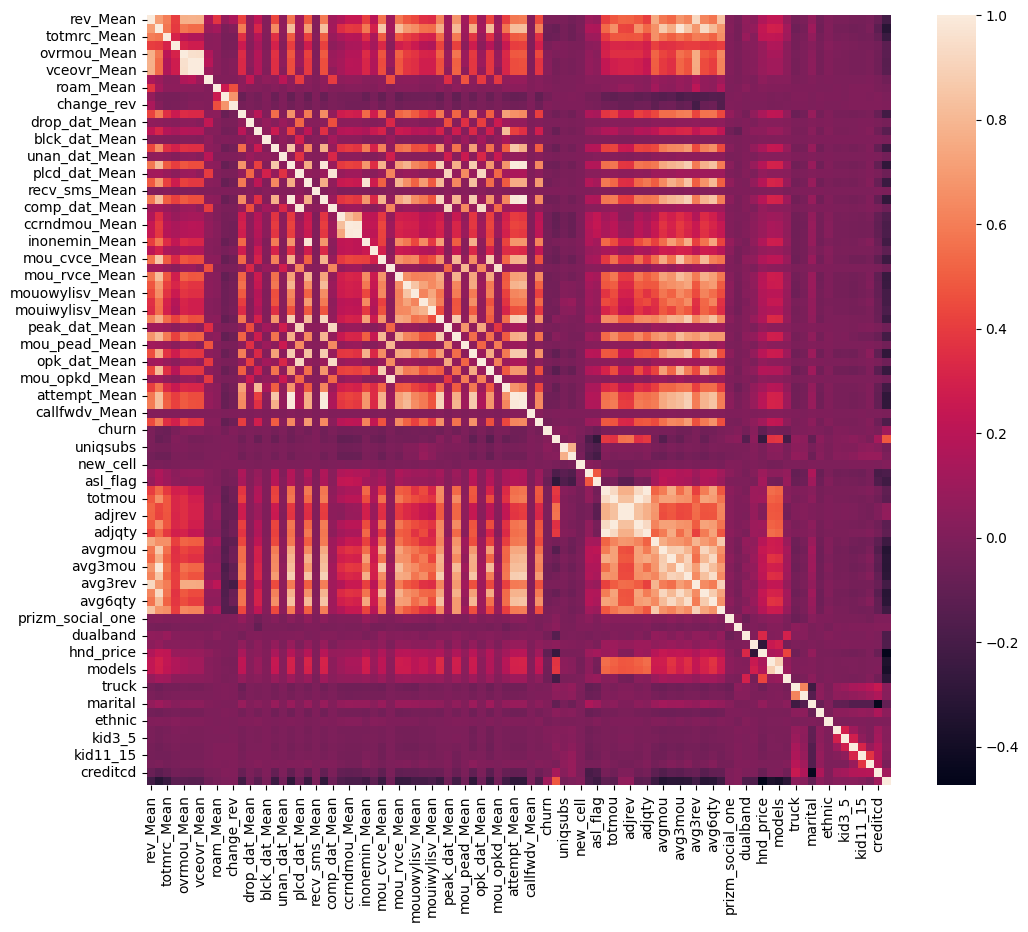

In [21]:
#Heatmap

plt.figure(figsize=(12, 10))
corr_matrix = clean_data.corr()

sns.heatmap(corr_matrix)

plt.plot()

**Removing Highly Corelated Data**

In [22]:
abs_corr_mat = corr_matrix.abs()

#Select upper traingle of correlation matrix
upper = abs_corr_mat.where(np.triu(np.ones(abs_corr_mat.shape), k=1).astype(bool))

#Features Having Correlation Greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print('Highly Corelated Features:')
print(to_drop)

clean_data2 = clean_data.drop(to_drop, axis = 1)

Highly Corelated Features:
['ovrrev_Mean', 'vceovr_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'mou_opkd_Mean', 'attempt_Mean', 'complete_Mean', 'adjrev', 'adjmou', 'adjqty', 'avg3mou', 'avg6qty']


[]

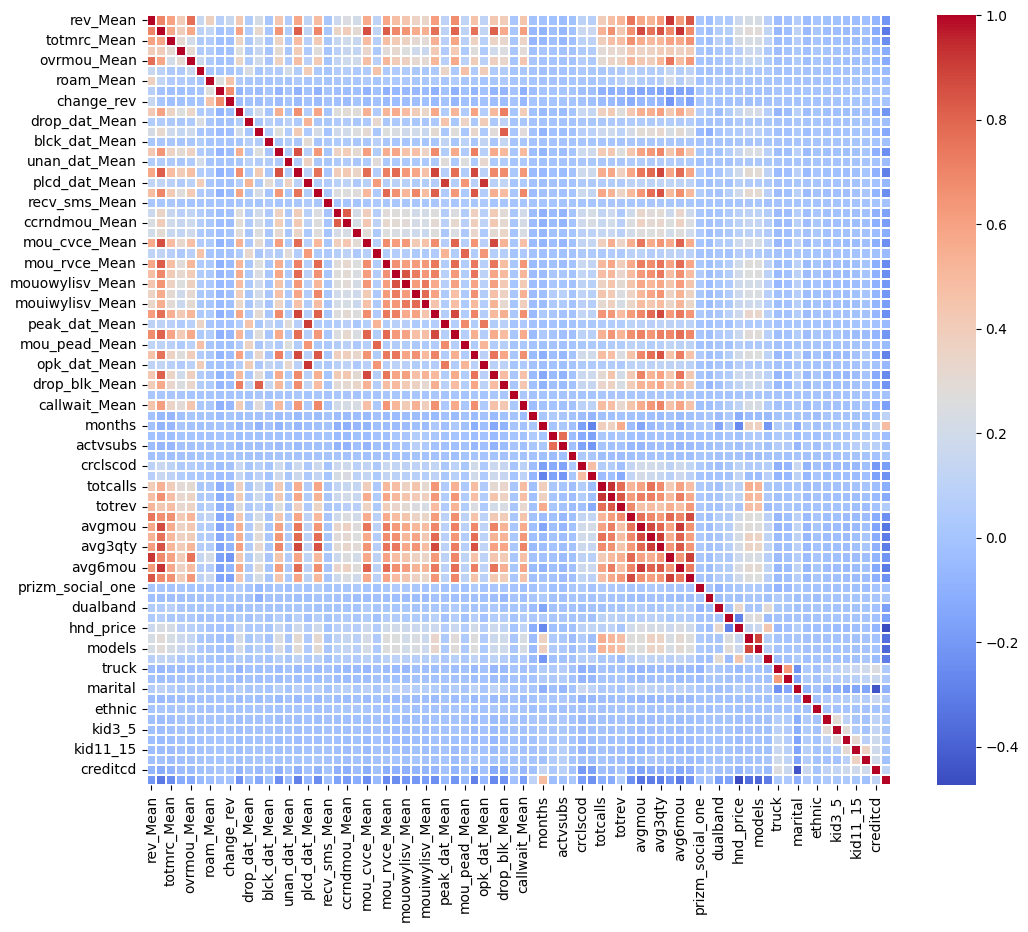

In [23]:
plt.figure(figsize=(12, 10))

corr_matrix2 = clean_data2.corr()
sns.heatmap(corr_matrix2, cmap='coolwarm', linewidths=0.02)
plt.plot()

In [24]:
clean_data2.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,custcare_Mean,ccrndmou_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,drop_blk_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,avgrev,avgmou,avgqty,avg3qty,avg3rev,avg6mou,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,marital,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,58.719985,513.559937,46.179136,0.888828,41.072247,0.261318,1.286405,-13.933818,-1.021067,5.955085,0.040520,4.022917,0.025777,27.784905,0.029810,144.881677,0.870548,55.085152,0.047590,1.790838,4.666880,0.284720,227.763520,1.844036,111.654562,24.753320,28.467865,7.894360,18.193037,88.480285,0.358162,174.080788,0.707832,66.003498,0.416283,165.280703,10.044298,0.011700,1.782928,0.495620,18.833990,1.548140,1.358960,1.055160,8.200890,0.139360,2877.141930,7648.363833,1031.924988,57.913832,483.726493,173.554507,180.337320,59.193330,509.634576,58.683618,2.23284,8.470250,2.215580,0.144060,101.875763,1.787118,1.545825,1.856870,0.188820,0.082580,2.783610,0.057974,9.110500,0.040120,0.046960,0.080730,0.08814,0.099640,0.689660,391.932309
std,46.208972,524.229868,23.581283,2.173729,97.122320,3.120946,14.685090,274.854774,50.138337,8.954715,0.877136,10.672202,1.490255,38.358734,0.496970,158.267711,9.053901,86.841198,2.127422,5.315570,12.761953,1.092101,264.403894,23.733226,162.691285,34.414822,48.962903,16.145590,41.421462,103.066103,4.065630,207.673553,8.410151,91.456885,4.652627,237.332918,15.418406,0.547470,5.353953,0.499983,9.655794,1.075255,0.655555,0.572556,11.353526,0.346324,3790.863474,8666.558293,852.907511,36.161292,438.485213,167.824576,192.725835,46.695429,489.562483,40.175838,1.33037,5.187744,1.283434,0.351152,60.746760,1.313971,0.898391,0.356854,0.387964,0.272854,1.183892,0.231663,3.700514,0.196242,0.211554,0.272421,0.28350,0.299521,0.462635,256.480910
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.650000,0.480000,0.000000,0.000000,0.000000,1.000000,0.000000,-2.000000,0.00000,0.000000,0.000000,0.000000,9.989998,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

**Splitting Data**

In [25]:
X = clean_data2.drop(['churn'], axis = 1)
y = clean_data2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

print('Training Data: ', X_train.shape, ' ' , y_train.shape)
print('Training Data: ', X_test.shape, ' ' , y_test.shape)

Training Data:  (70000, 75)   (70000,)
Training Data:  (30000, 75)   (30000,)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Support Vector Classifier (SVC)
Logistic_model = LogisticRegression(max_iter=1000)
Logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [28]:
Logistic_model.score(X_test, y_test)

0.5883

In [31]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_model = RandomForestClassifier(n_estimators = 1000)
RandomForest_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [32]:
RandomForest_model.score(X_test,y_test)

0.6288

In [35]:
from sklearn.datasets import load_iris
from sklearn import tree
DecisionTree_model = tree.DecisionTreeClassifier()
DecisionTree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
DecisionTree_model.score(X_test,y_test)

0.5520333333333334

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(["Logistic_model", "RandomForest_model","DecisionTree_model"])
ypoints = np.array([Logistic_model.score(X_test, y_test),RandomForest_model.score(X_test,y_test),DecisionTree_model.score(X_test,y_test)])

plt.plot(xpoints, ypoints)
plt.show()